### Bootstrapping

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [36]:
population = np.random.normal(10, 3, size=500)

In [37]:
measurements = np.random.choice(population, size=15, replace=False)

In [38]:
measurements

array([  4.03261422,   4.7676415 ,  10.70370728,   8.8678395 ,
         8.75102877,  10.83411325,   8.68674331,   9.26560043,
        12.60823199,   8.28278292,  13.54910748,  11.63431497,
         7.85754033,   5.33007875,   9.73838691])

In [39]:
bootstrapped_means = []
for i in range(200):
    bootstrap = np.random.choice(measurements, size=len(measurements), replace=True)
    bootstrapped_means.append(np.mean(bootstrap))
    
print np.mean(bootstrapped_means)
print np.min(bootstrapped_means), np.max(bootstrapped_means)

8.88418460994
7.05725419652 10.8201170194


In [43]:
p025, p975 = np.percentile(bootstrapped_means, (2.5, 97.5))

In [44]:
print p025, p975

7.6633765854 10.0751948817


In [40]:
np.mean(measurements)

8.9939821071782031

In [41]:
np.mean(population)

10.057406875754488

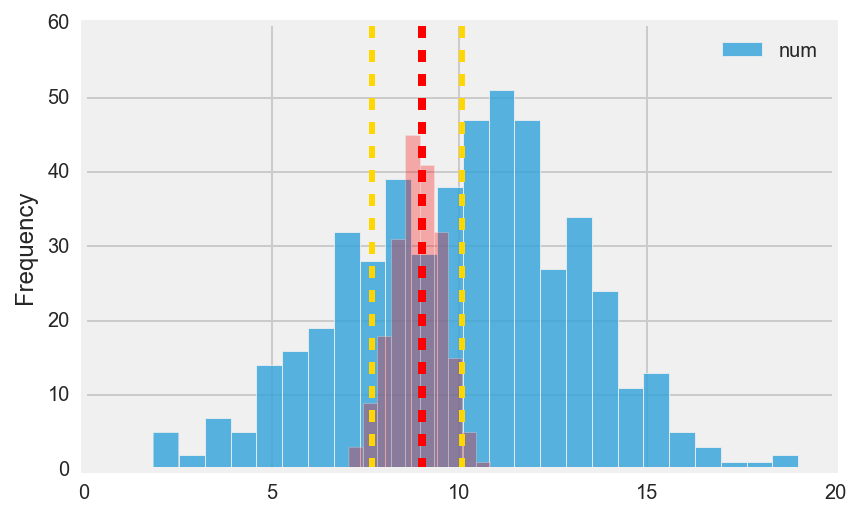

In [45]:
ax = pd.DataFrame({'num':population}).plot(kind='hist', bins=25, alpha=0.8)
ax.axvline(np.mean(measurements), ls='dashed', lw=4, color='red')
ax.hist(bootstrapped_means, color='red', alpha=0.3)
ax.axvline(p025, ls='dashed', lw=3, color='gold')
ax.axvline(p975, ls='dashed', lw=3, color='gold')

### Topic votes:

Gradient boosting vs. AdaBoost: 7
Hinge Loss: 2
Pipelines: 5
Feature importances: 0
LDA: 2
NLP: 2





In [46]:
data = pd.read_csv('/Users/kiefer/github-repos/DSI-SF-2/datasets/adult_salary/adult.csv')

In [47]:
data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small


In [52]:
data = data[['age','education','sex','capital-gain','capital-loss','hours-per-week']]
y = data.age.values
X = data.drop('age', axis=1)

In [53]:
X.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [54]:
X.sex.unique()

array(['Male', 'Female'], dtype=object)

In [50]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [62]:
class AdultPreprocessor(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, *args):
        return self
    
    def transform(self, X, *args):
        
        Xcopy = X.copy()
        
        college = ['Bachelors', 'Some-college', 'Assoc-acdm', 'Assoc-voc']
        postgrad = ['Masters', 'Doctorate', 'Prof-school']
        
        # high school, college, post-grad
        # high school will be reference
        Xcopy['college'] = Xcopy.education.map(lambda x: 1 if x in college else 0)
        Xcopy['postgrad'] = Xcopy.education.map(lambda x: 1 if x in postgrad else 0)
        
        # make male column, female is reference category:
        Xcopy['male'] = Xcopy.sex.map(lambda x: 1 if x == 'Male' else 0)
        
        Xcopy.drop(['education','sex'], axis=1, inplace=True)
        return Xcopy

In [74]:
a = [1,2]
b = a[:]
b.append(3)
a

[1, 2, 3]

In [63]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33)

In [64]:
ap = AdultPreprocessor()
Xtrain_p = ap.transform(Xtrain)
Xtrain_p.head(3)

,capital-gain,capital-loss,hours-per-week,college,postgrad,male
31809,5178,0,40,0,0,1
17967,0,0,40,1,0,0
9437,0,0,40,0,0,1


In [73]:
Xtest.head(2)

,education,sex,capital-gain,capital-loss,hours-per-week
30154,Some-college,Male,0,0,45
48476,HS-grad,Male,0,0,40


In [70]:
pipe = Pipeline(steps=[
        ['ap', AdultPreprocessor()],
        ['ss', StandardScaler()],
        ['lasso', Lasso(alpha=0.01)]
    ])

In [71]:
pipe.fit(Xtrain, ytrain)


Pipeline(steps=[['ap', AdultPreprocessor()], ['ss', StandardScaler(copy=True, with_mean=True, with_std=True)], ['lasso', Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)]])

In [72]:
pipe.score(Xtest, ytest)

0.029695220593969007